#TUDO

##Bibliotecas

In [ ]:
!pip install pandas spacy networkx matplotlib tqdm
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 917.0 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import unicodedata
import json
from networkx.readwrite import json_graph
from google.colab import drive
drive.mount('/content/drive')
# Baixar recursos necessários do NLTK (executar apenas na primeira vez)
nltk.download('stopwords')
nltk.download('rslp')

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


##Função Pré-processamento

In [ ]:
def pre_processamento(texto):
      # Converter para minúsculas
    texto = texto.lower()
    # Remover acentos e caracteres especiais
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    # Remover caracteres não alfabéticos e números
    texto = re.sub(r'[^a-z\s]', ' ', texto)
    # Remover espaços em excesso
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Tokenização
    tokens = texto.split()
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = [palavra for palavra in tokens if palavra not in stop_words]
    return ' '.join(tokens)

## Carregando a Corpora do github

###Dataset Fake.br

In [ ]:
url = 'https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/refs/heads/master/preprocessed/pre-processed.csv'

In [ ]:
noticias1 = pd.read_csv(url)
noticias1.drop(columns=['index'], inplace=True)
noticias1.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [ ]:
dados1 = noticias1[noticias1['label'] == 'true']
dados1.rename(columns={'preprocessed_news':'news_true'}, inplace=True)
dados1.head()

/tmp/ipython-input-3575085802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados1.rename(columns={'preprocessed_news':'news_true'}, inplace=True)


,label,news_true
3600,true,podemos decidiu expulsar deputado federal carl...
3601,true,bolsonaro liberal completo diz presidente psl ...
3602,true,ministro stf libera andrea neves prisao domici...
3603,true,apesar abundancia cresce preocupacao preservac...
3604,true,harvard mit levarao dilma moro suplicy eua meg...


###Dataset FakeTrue.Br

In [ ]:
url2 = 'https://raw.githubusercontent.com/jpchav98/FakeTrue.Br/refs/heads/main/FakeTrueBr_corpus.csv'

In [ ]:
noticias2 = pd.read_csv(url2)
#noticias.drop(columns=['index'], inplace=True)
noticias2.head()

,title_fake,fake,link_f,true,link_t
0,vídeo mostra arrastão em olinda pe por causa d...,carnaval em olinda. arrastão monstro. fazuele ...,https://www.boatos.org/entretenimento/video-ar...,circula pelas redes sociais um vídeo que most...,https://g1.globo.com/pe/pernambuco/carnaval/20...
1,carro alegórico da grande rio em homenagem ao ...,carro alegórico da escola de samba grande rio...,https://www.boatos.org/entretenimento/carro-al...,pouco antes de a beijaflor de nilópolis entra...,https://g1.globo.com/rj/rio-de-janeiro/carnava...
2,cantor leo chaves grava vídeo de apoio a manif...,cantor léo apoiando atos antidemocráticos. alg...,https://www.boatos.org/entretenimento/cantor-l...,circula nas redes sociais um vídeo que mostra...,https://g1.globo.com/fato-ou-fake/noticia/2023...
3,anitta está com câncer e pede por um milagre e...,versão 1 ore muito pela cantora anitta! ela es...,https://www.boatos.org/entretenimento/anitta-e...,"anitta explicou, nesta terçafeira 7, o proble...",https://g1.globo.com/pop-arte/noticia/2022/06/...
4,erasmo carlos morre aos 81 anos no rio de jane...,morre erasmo carlos aos 81 anos cantor conside...,https://www.boatos.org/entretenimento/erasmo-c...,"o cantor e compositor erasmo carlos, de 81 an...",https://g1.globo.com/rj/rio-de-janeiro/noticia...


In [ ]:
dados2 = noticias2[['true','link_t']]
#dados2.rename(columns={'true':'news_true'}, inplace=True)
dados2.head()

,true,link_t
0,circula pelas redes sociais um vídeo que most...,https://g1.globo.com/pe/pernambuco/carnaval/20...
1,pouco antes de a beijaflor de nilópolis entra...,https://g1.globo.com/rj/rio-de-janeiro/carnava...
2,circula nas redes sociais um vídeo que mostra...,https://g1.globo.com/fato-ou-fake/noticia/2023...
3,"anitta explicou, nesta terçafeira 7, o proble...",https://g1.globo.com/pop-arte/noticia/2022/06/...
4,"o cantor e compositor erasmo carlos, de 81 an...",https://g1.globo.com/rj/rio-de-janeiro/noticia...


In [ ]:
dados2['news_true'] = dados2['true'].apply(pre_processamento)
dados2.drop(columns=['true'], inplace=True)
dados2.head()

/tmp/ipython-input-4185029269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['news_true'] = dados2['true'].apply(pre_processamento)
/tmp/ipython-input-4185029269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2.drop(columns=['true'], inplace=True)


,link_t,news_true
0,https://g1.globo.com/pe/pernambuco/carnaval/20...,circula redes sociais video mostra expresident...
1,https://g1.globo.com/rj/rio-de-janeiro/carnava...,pouco antes beijaflor nilopolis entrar sapucai...
2,https://g1.globo.com/fato-ou-fake/noticia/2023...,circula redes sociais video mostra cantor leo ...
3,https://g1.globo.com/pop-arte/noticia/2022/06/...,anitta explicou nesta tercafeira problema saud...
4,https://g1.globo.com/rj/rio-de-janeiro/noticia...,cantor compositor erasmo carlos anos morreu ne...


###Dataset FakeRecogna

In [ ]:
noticias3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Grafos/FakeRecogna_no_removal_words.xlsx')
#noticias.drop(columns=['index'], inplace=True)
noticias3.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nArthur Lira fraudou a votação sobre voto i...,Boato – Está comprovado que a votação sobre o ...,bomba lira fraudar o votação brasília explodir...,política,17/08/2021,\nEdgard Matsuki,https://www.boatos.org/politica/arthur-lira-fr...,0
1,WhatsApp agora permite silenciar conversas e g...,"Opção vinha sendo testada no aplicativo, e foi...",o whatsapp liberar quinta-feira atualização ap...,política,23/10/2020 10h02,Por G1,https://g1.globo.com/economia/tecnologia/notic...,1
2,"Com Lula, Bolsonaro e Ciro, Fortaleza vira mic...",NaN,debater propor o cidade o campanha prefeitura ...,política,27/10/2020 04h00,Carlos Madeiro,https://noticias.uol.com.br/eleicoes/2020/10/2...,1
3,Alesp aprova projeto que multa em até R$ 100 m...,NaN,o alesp assembleia legislativo paulo aprovar h...,saúde,10/02/2021 23h56,10/02/2021 23h56,https://noticias.uol.com.br/saude/ultimas-noti...,1
4,\n Não é verdade que Fauci sabia há 15 anos q...,Publicações compartilhadas dezenas de vezes de...,“ fauci aprovar o hidroxicloroquina haver ano ...,saúde,11/08/2020 às 20:45,AFP Austrália,https://checamos.afp.com//nao-e-verdade-que-fa...,0


In [ ]:
dadosT= noticias3[['Noticia', 'Classe']]
dadosT.head()

,Noticia,Classe
0,bomba lira fraudar o votação brasília explodir...,0
1,o whatsapp liberar quinta-feira atualização ap...,1
2,debater propor o cidade o campanha prefeitura ...,1
3,o alesp assembleia legislativo paulo aprovar h...,1
4,“ fauci aprovar o hidroxicloroquina haver ano ...,0


In [ ]:
dados3 = dadosT[dadosT['Classe'] == 1]
dados3.head()

,Noticia,Classe
1,o whatsapp liberar quinta-feira atualização ap...,1
2,debater propor o cidade o campanha prefeitura ...,1
3,o alesp assembleia legislativo paulo aprovar h...,1
5,dia noite acessório passar o código vestimenta...,1
7,o provável origem coronavírus mercar comercial...,1


In [ ]:
dados3['news_true']= dados3['Noticia'].apply(pre_processamento)
dados3.drop(columns=['Noticia'], inplace=True)
dados3.head()

/tmp/ipython-input-467642448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados3['news_true']= dados3['Noticia'].apply(pre_processamento)
/tmp/ipython-input-467642448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados3.drop(columns=['Noticia'], inplace=True)


,Classe,news_true
1,1,whatsapp liberar quinta feira atualizacao apli...
2,1,debater propor cidade campanha prefeitura fort...
3,1,alesp assembleia legislativo paulo aprovar hoj...
5,1,dia noite acessorio passar codigo vestimenta p...
7,1,provavel origem coronavirus mercar comercializ...


###Concatenando todos os datasets

In [ ]:
dados_final = pd.concat([dados1, dados2, dados3], ignore_index=True)
dados_final.drop(columns=['link_t', 'Classe'], inplace=True)
dados_final.fillna('true', inplace=True)
dados_final

,label,news_true
0,true,podemos decidiu expulsar deputado federal carl...
1,true,bolsonaro liberal completo diz presidente psl ...
2,true,ministro stf libera andrea neves prisao domici...
3,true,apesar abundancia cresce preocupacao preservac...
4,true,harvard mit levarao dilma moro suplicy eua meg...
...,...,...
11337,true,compilar associacao medicinar intensivo brasil...
11338,true,porta voz organizacao mundial saudar oms marga...
11339,true,encontrar reunir presidente jair bolsonaro man...
11340,true,reabertura complexo parque disney orlar defini...


In [ ]:
dados_final.isnull().sum()

,0
label,0
news_true,0


In [ ]:
dados_final.to_csv('dataset_completo.csv', index=False)

##Extrair triplas

In [ ]:
# Carregar modelo large do spacy
nlp = spacy.load("pt_core_news_lg")
# Função para extrair triplas
def extract_triples(text):
    doc = nlp(text)
    triples = []
    for sent in doc.sents:
        subj, pred, obj = None, None, None
        for token in sent:
            if "subj" in token.dep_:
                subj = token.text
            if token.pos_ == "VERB":
                pred = token.lemma_
            if "obj" in token.dep_ and token.dep_ in ("dobj", "obj"):
                obj = token.text
        if subj and pred and obj:
            triples.append((subj, pred, obj))
    return triples

In [ ]:
# Aplicando extração de triplas
tqdm.pandas(desc="Extraindo triplas")
dados_final["triples"] = dados_final["news_true"].progress_apply(extract_triples)

Extraindo triplas: 100%|██████████| 11342/11342 [10:42<00:00, 17.65it/s]


In [ ]:
#dados_final

,label,news_true,triples
0,true,podemos decidiu expulsar deputado federal carl...,"[(fazer, receber, senadora), (nota, acordar, a..."
1,true,bolsonaro liberal completo diz presidente psl ...,"[(psl, viver, trajetoria), (nao, divulgar, pre..."
2,true,ministro stf libera andrea neves prisao domici...,"[(ministro, prisaor, marco), (aurelio, valer, ..."
3,true,apesar abundancia cresce preocupacao preservac...,"[(preservacao, recuperacaor, cidade), (nao, la..."
4,true,harvard mit levarao dilma moro suplicy eua meg...,"[(harvard, moro, dilma), (disse, dizer, bbc), ..."
...,...,...,...
11337,true,compilar associacao medicinar intensivo brasil...,"[(terapia, plataforma, presidente), (ajudar, t..."
11338,true,porta voz organizacao mundial saudar oms marga...,"[(jair, vacinar, chines), (instituto, pesquisa..."
11339,true,encontrar reunir presidente jair bolsonaro man...,"[(norma, preceder, pessoa), (distanciamento, c..."
11340,true,reabertura complexo parque disney orlar defini...,"[(distanciamento, incentivar, rotina), (ano, d..."


In [ ]:
#dados_final.to_csv('dados_com_triplas.csv', index=False)

##Criando o grafo

In [ ]:
# Abrir o grafo a partir do arquivo json
with open("/content/drive/MyDrive/Colab Notebooks/Grafos/grafos json/grafo_json.json", "r", encoding='utf-8') as f:
    loaded_data = json.load(f)

# Reconstruir o objeto grafo NetworkX
G = json_graph.node_link_graph(loaded_data)

print(f"Grafo carregado: {len(G.nodes)} nós, {len(G.edges)} arestas")

/usr/local/lib/python3.12/dist-packages/networkx/readwrite/json_graph/node_link.py:290: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


Grafo carregado: 19395 nós, 113736 arestas


In [ ]:
# Criando grafo
'''G = nx.Graph()

# Adicionar triplas ao grafo
for idx, row in dados_final.iterrows():
    if isinstance(row["triples"], list):  # Verificar se é uma lista
        for triple in row["triples"]:
            if len(triple) == 3:  # Garantir formato (subj, pred, obj)
                subj, pred, obj = triple
                G.add_edge(subj, obj, predicate=pred, fonte="noticia", rotulo=row["label"])

print(f"Grafo construído: {len(G.nodes)} nós, {len(G.edges)} arestas")'''

'G = nx.Graph()\n\n# Adicionar triplas ao grafo\nfor idx, row in dados_final.iterrows():\n    if isinstance(row["triples"], list):  # Verificar se é uma lista\n        for triple in row["triples"]:\n            if len(triple) == 3:  # Garantir formato (subj, pred, obj)\n                subj, pred, obj = triple\n                G.add_edge(subj, obj, predicate=pred, fonte="noticia", rotulo=row["label"])\n\nprint(f"Grafo construído: {len(G.nodes)} nós, {len(G.edges)} arestas")'

##Plotagem do grafo

In [ ]:
# Dicionário {nó: grau}
graus = dict(G.degree())
# Ordenar nós por grau (decrescente)
nos_ordenados = sorted(graus.items(), key=lambda x: x[1], reverse=True)
# Selecionar top N nós
top_nos = nos_ordenados[:20]
# Imprimir resultados
for no, grau in top_nos:
    print(f"{no}: {grau} conexões")

nao: 2729 conexões
presidente: 1820 conexões
tambem: 1397 conexões
pais: 1277 conexões
ja: 1210 conexões
pessoas: 1026 conexões
r: 922 conexões
brasil: 868 conexões
voce: 856 conexões
anos: 854 conexões
governo: 837 conexões
policia: 706 conexões
paulo: 703 conexões
ministro: 701 conexões
pessoa: 652 conexões
dia: 590 conexões
gente: 582 conexões
ministerio: 575 conexões
lula: 560 conexões
so: 539 conexões


In [ ]:
#top_nos_df = pd.DataFrame(top_nos, columns=['No', 'Grau'])
#top_nos_df.to_csv('top_nos.csv', index=False)


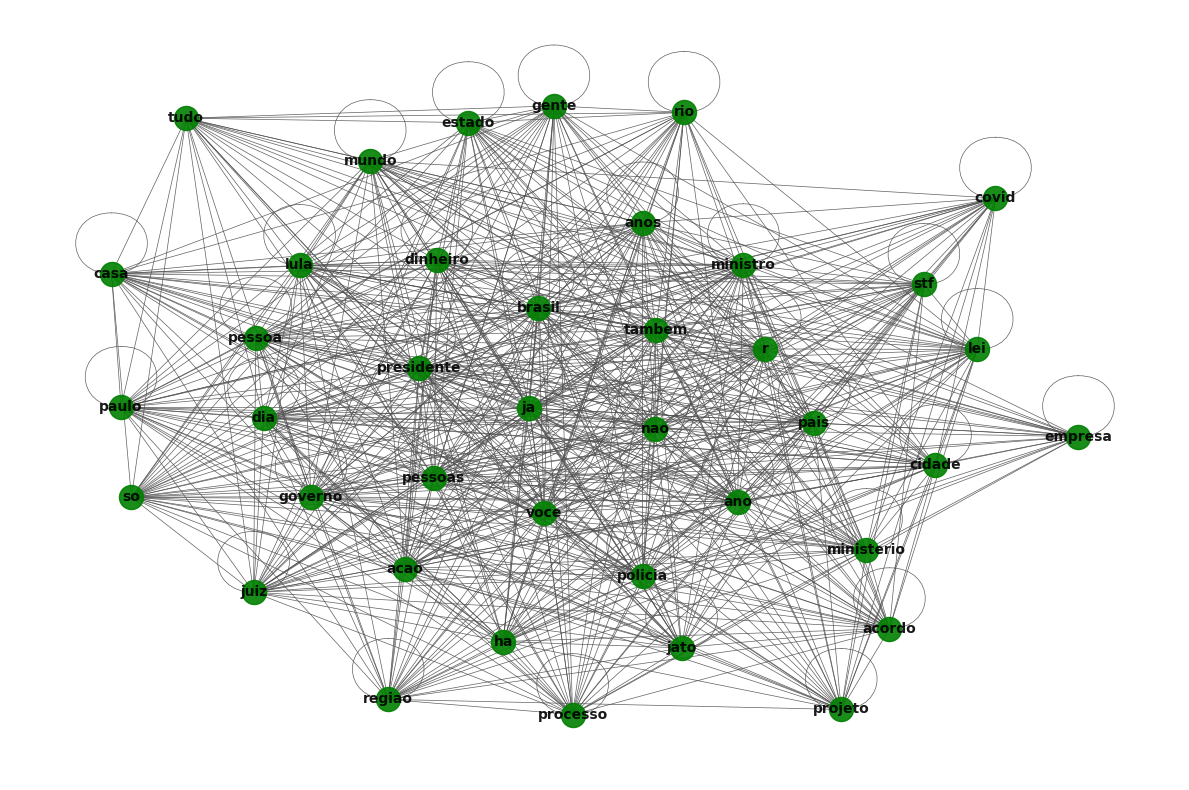

In [ ]:
# Identificar os nós com maior grau
graus = dict(G.degree())
grau_nos = sorted(graus.items(), key=lambda x: x[1], reverse=True)[:40]
lista = [no for no, grau in grau_nos]

# Criar subgrafo com os nós e suas conexões
subgrafo = G.subgraph(lista)

# Configurar visualização
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgrafo, k=0.7, seed=42)  # Layout mais espaçado

# Desenhar o grafo
nx.draw_networkx(
    subgrafo,
    pos,
    node_color='green',
    edge_color='#4F4F4F',
    with_labels=True,
    font_size=10,
    font_weight='bold',
    alpha=0.9,
    width=0.5
)

# Adicionar título e legenda
#plt.title("Grafo dos Nós de maior grau", fontsize=16, pad=20)
plt.axis('off')

# Mostrar grafo
plt.tight_layout()
plt.savefig('grafo.png', transparent=True, bbox_inches='tight') #para salvar sem fundo branco
plt.show()

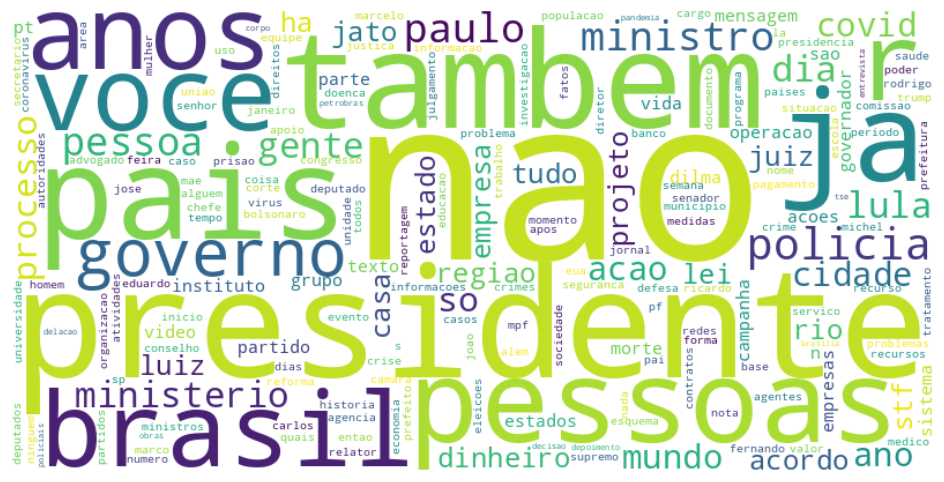

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of words and their frequencies (node degrees)
word_freq = {node: degree for node, degree in G.degree()}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
'''#Visualização do grafo
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, k=0.3, seed=42)

nx.draw(G, pos, node_size=100, alpha=0.7,
        edge_color="gray", width=0.5, with_labels=True,
        labels={n: n for n in G.nodes if G.degree(n) > 2},
        font_size=8, font_family="sans-serif")

plt.title("Relações entre Entidades")
plt.show()'''

'#Visualização do grafo\nplt.figure(figsize=(15,10))\npos = nx.spring_layout(G, k=0.3, seed=42)\n\nnx.draw(G, pos, node_size=100, alpha=0.7,\n        edge_color="gray", width=0.5, with_labels=True,\n        labels={n: n for n in G.nodes if G.degree(n) > 2},\n        font_size=8, font_family="sans-serif")\n\nplt.title("Relações entre Entidades")\nplt.show()'

##Salvando o grafo em Json

In [ ]:
'''# salvando o grafo em json
data = json_graph.node_link_data(G)

with open("grafo.json", "w", encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)'''

'# salvando o grafo em json\ndata = json_graph.node_link_data(G)\n\nwith open("grafo.json", "w", encoding=\'utf-8\') as f:\n    json.dump(data, f, ensure_ascii=False, indent=2)'

##Função para calcular o valor de verdade

In [ ]:
def calcular_valor_verdade(G, sujeito, objeto):
  # Verificar se ambos os nós (sujeito e objeto) existem no grafo
    if sujeito not in G or objeto not in G:
        # Se um ou ambos os nós não existem, não há caminho possível
        #print(f"'{sujeito}' ou '{objeto}' não encontrados no grafo.")
        return 0.0
    try:
        # Encontrar todos os caminhos mais curtos
        caminhos = nx.all_shortest_paths(G, sujeito, objeto)

        menor_custo = float('inf')
        for caminho in caminhos:
            # Calcular custo do caminho (Eq.1 do artigo)
            custo = sum(math.log(G.degree(nó)) for nó in caminho[1:-1])  # Ignora nós inicial/final
            if custo < menor_custo:
                menor_custo = custo

        # Calcular tau (inverso do custo + 1)
        return 1 / (1 + menor_custo) if menor_custo != float('inf') else 0.0

    except nx.NetworkXNoPath:
        return 0.0  # Sem caminho = afirmação falsa

##Função para verificar sentenças

In [ ]:
def verificar_sentenca(grafo, sentenca):
    triplas = extract_triples(pre_processamento(sentenca))
    if not triplas:
        return 0.0, "Nenhuma tripla válida encontrada."  # Return classification as "falsa" when no triples are found

    # Calcular tau para cada tripla
    valores_tau = []
    for s, p, o in triplas:
        tau = calcular_valor_verdade(grafo, s, o)
        valores_tau.append(tau)

    # tau médio (ou mínimo, conforme necessidade)
    tau_final = sum(valores_tau) / len(valores_tau) if valores_tau else 0.0
    #print(tau_final)

   # Classificação com três níveis
    if tau_final < 0.40:
        classificacao = "falsa"
    elif 0.40 <= tau_final <= 0.59:
        classificacao = "meia verdade"
    else:  # tau_final >= 0.60
        classificacao = "verdadeira"

    return tau_final, classificacao


##Testes

In [ ]:
# Exemplo com uma noticia falsa

#sentenca1 = 'A crise financeira do Rio de Janeiro, que impactou diretamente nos indicadores de violência, levou o presidente Michel Temer a decretar a intervenção federal na segurança pública do estado, no dia 16 de fevereiro. Em cerimônia no Palácio do Planalto, Temer nomeou como interventor o general de Exército Walter Souza Braga Netto. A intervenção se estenderá até o dia 31 de dezembro. Com a medida, o comando das polícias civil e militar, dos bombeiros e do sistema penitenciário foi unificado, e o governo federal investiu na estrutura do sistema de segurança do Rio de Janeiro, que estava sucateada. Em agosto, foram destinados R$ 1,2 bilhão. No último dia 27, o interventor federal disse que após dez meses de trabalho a intervenção atingiu os objetivos de recuperar a capacidade operativa dos órgãos de segurança pública e baixar os índices de criminalidade. '
sentenca1 = "katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma"
tau, resultado1 = verificar_sentenca(G, sentenca1)

print(f"\nSentença: '{sentenca1}'")
print(f"TAU médio: {tau:.2f} --> Classificação: {resultado1}")


Sentença: 'katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma'
TAU médio: 0.32 --> Classificação: falsa


In [ ]:
# Exemplo com sentença verdadeira

sentenca2 = 'o provável origem coronavírus mercar comercializar animar viver chinar banir consequência pandemia covid-19 o prever paul mccartney o futurar realmente esperar significar o governar chinês ok pessoal realmente precisar super-higiênicos sincero medieval comer morcegar afirmar hoje o ex-beatle o o apresentador rádio americano howard stern mccartney reconhecer defensor direito animar n mercar o principal motivar o surtir atual coronavírus estabelecimento comum cidade wuhan considerar o epicentro epidemiar chinar n vender mercadoria viver abater animar horar d silvestre'
#sentenca2 = 'Número de fuzilados durante o regime de Fidel Castro pode ter chegado à casa dos 17 mil.  De acordo com documentos do projeto "Cuba Archive", organizado por cubano-americanos residentes em Nova Jersey, o chamado "Paredón" cubano vitimou ao menos 3.820.  De acordo com a fonte, porém, os fuzilamentos na ilha desde a instauração do regime de Fidel, podem ter chegado à casa dos 17 mil Em 50 anos, o regime dos irmãos Castro fuzilou ao menos 3.820 pessoas e, segundo a estimativa do próprio Fidel, o governo de Cuba manteve (na década de 60) cerca de 20 mil oponentes políticos atrás das grades. Os coordenadores do projeto "Cuba Archive", existente desde 1996, compilou documentos e depoimentos desde 1959 até a data de hoje  os dados estão disponíveis no site ( www.cubaarchive.org ). Há outras três estimativas citadas por analistas e historiadores consultados pela Folha de SP sobre o "paredón" cubano. O "Livro Negro do Comunismo" (Bertrand Brasil, 1999), relata que entre 15 mil e 17 mil pessoas foram fuziladas. Já o liveo "Cuba, Cronología, Cinco Siglos de Historia, Política y Cultura", de 2003, do historiador cubano Leopoldo Fornés-Bonavía, estima que ao menos 4.000 opoentes ao governo foram fuzilados até o final de 1961. Hugh Thomas, historiador britânico e autor de "Cuba or The Pursuit of The Liberty" (1971), diz que em torno de 5.000 foram fuzilados até 1970. E pra quem ainda acha que Fidel foi uma boa pessoa, o Google está aí [...] basta perder um tempinho e pesquisar.'
tau, resultado2 = verificar_sentenca(G, sentenca2)

print(f"\nSentença: '{sentenca2}'")
print(f"TAU médio: {tau:.2f} --> Classificação: {resultado2}")


Sentença: 'o provável origem coronavírus mercar comercializar animar viver chinar banir consequência pandemia covid-19 o prever paul mccartney o futurar realmente esperar significar o governar chinês ok pessoal realmente precisar super-higiênicos sincero medieval comer morcegar afirmar hoje o ex-beatle o o apresentador rádio americano howard stern mccartney reconhecer defensor direito animar n mercar o principal motivar o surtir atual coronavírus estabelecimento comum cidade wuhan considerar o epicentro epidemiar chinar n vender mercadoria viver abater animar horar d silvestre'
TAU médio: 1.00 --> Classificação: verdadeira


##Métricas de avaliação completa

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Grafos/datasets/corpora_final.csv')
df

,label,News
0,0,katia abreu diz vai colocar expulsao moldura n...
1,0,ray peita bolsonaro conservador fake entrevist...
2,0,reinaldo azevedo desmascarado policia federal ...
3,0,relatorio assustador bndes mostra dinheiro pub...
4,0,radialista americano fala sobre pt vendem ilus...
...,...,...
22679,0,“ vazar futuro cepa covid-19 e letalidade pror...
22680,0,o publicação compartilhar vezar o facebook div...
22681,0,"história disseminar site notícia 1,2,3,4 princ..."
22682,0,publicação circular rede social pedir o minist...


In [ ]:
'''
n = 20
# Suponha que df seja seu DataFrame e 'categoria' a coluna de interesse
amostra_cat1 = df1[df1['label'] == 1].sample(n, random_state=42)
amostra_cat2 = df1[df1['label'] == 0].sample(n, random_state=42)
df = pd.concat([amostra_cat1, amostra_cat2])
df'''

,label,News
4996,1,determinacao diminuicao vazao represa caconde ...
4143,1,cunha diz joesley encontrou lula discutir impe...
15295,1,o lotar vacinar covid-19 pfizer biontech chega...
5541,1,renan volta comandar sessao senado dia apos se...
11355,1,o organização pan-americana saudar opar braço ...
15104,1,o irã registrar morte provocar coronavírus hor...
13480,1,o mosquito aedes aegyti sobrevoar terra domina...
12278,1,o allegra pacaembu empresar possuir o concessã...
13019,1,o município bacabal o quilômetros luís ganhar ...
14697,1,o câmara deputar pedir formalmente explicação ...


In [ ]:
# Obtem os valores reais
y_real = df['label'].tolist()
y_predito = []

# Loop com barra de progresso
for noticia in tqdm(df['News'], desc='Avaliando notícias'):
    tau, classificacao = verificar_sentenca(G, noticia)

    if classificacao == "verdadeira":
        previsao = 1
    elif classificacao == "meia verdade":
        previsao = 2
    else:
        previsao = 0

    y_predito.append(previsao)

# --- AVALIAÇÃO ---
print("\n" + "-" * 50)
print("📊 MÉTRICAS DE AVALIAÇÃO")
print("-" * 50)

# Acurácia
acuracia = accuracy_score(y_real, y_predito)
print(f"Acurácia:  {acuracia:.2%}")

# Precisão
precisao = precision_score(y_real, y_predito, average='weighted', zero_division=0)
print(f"Precisão:  {precisao:.2%}")

# Recall
recall = recall_score(y_real, y_predito, average='weighted', zero_division=0)
print(f"Recall:    {recall:.2%}")

# F1 Score
f1 = f1_score(y_real, y_predito, average='weighted', zero_division=0)
print(f"F1-score:  {f1:.2%}")

# AUC-ROC
try:
    auc = roc_auc_score(y_real, y_predito, multi_class='ovr')
    print(f"AUC-ROC:   {auc:.2%}")
except ValueError as e:
    print(f"AUC-ROC:   Erro ao calcular (provavelmente só uma classe presente) - {e}")

# Matriz de Confusão
cm = confusion_matrix(y_real, y_predito)
print(f"\nMatriz de Confusão:\n{cm}")

# Exibir matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


In [ ]:
y_real_series = pd.Series(y_real)
y_predito_series = pd.Series(y_predito)

print("Valores do y_real:\n", y_real_series.value_counts())
print("-" * 40)
print("\nValores do y_predito:\n", y_predito_series.value_counts())

Valores do y_real:
 1    100
0    100
Name: count, dtype: int64
----------------------------------------

Valores do y_predito:
 1    111
0     68
2     21
Name: count, dtype: int64


In [ ]:
noticias_meia_verdade = []
taus_meia_verdade = []
classificacoes_meia_verdade = []

y_predito = []

for noticia in tqdm(df['News'], desc='Avaliando notícias'):
    tau, classificacao = verificar_sentenca(G, noticia)

    if classificacao == "verdadeira":
        previsao = 1
    elif classificacao == "meia verdade":
        previsao = 2
        # Armazena informações para o novo DataFrame
        noticias_meia_verdade.append(noticia)
        taus_meia_verdade.append(tau)
        classificacoes_meia_verdade.append(classificacao)
    else:
        previsao = 0

    y_predito.append(previsao)

# Criando o DataFrame só com as notícias "meia verdade"
df_meia_verdade = pd.DataFrame({
    'noticia': noticias_meia_verdade,
    'tau': taus_meia_verdade,
    'classificacao': classificacoes_meia_verdade
})

Avaliando notícias: 100%|██████████| 22684/22684 [7:20:56<00:00,  1.17s/it]


In [ ]:
df_meia_verdade = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Grafos/datasets/df_meia_verdade.csv')


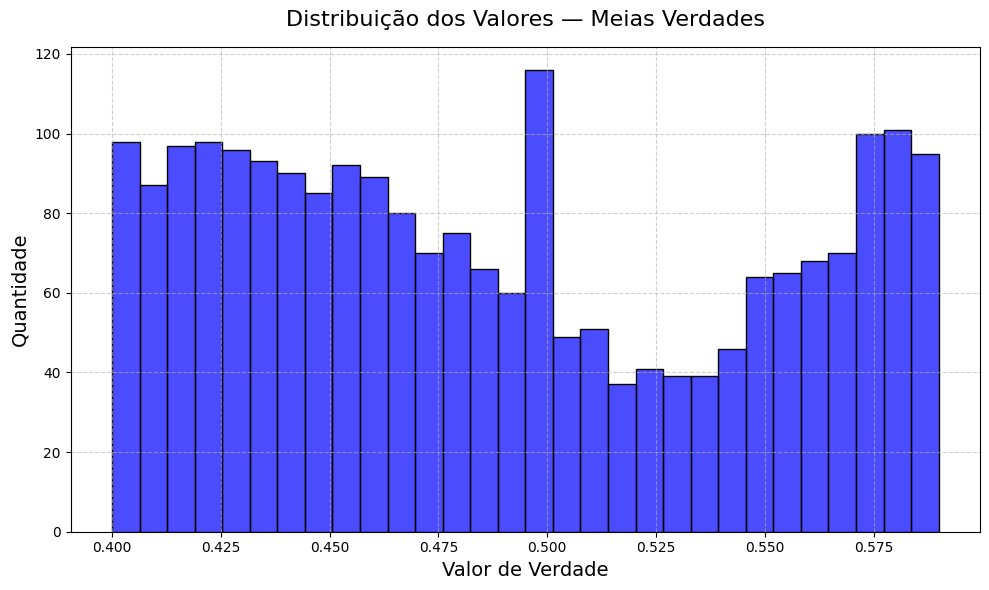

In [ ]:
# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_meia_verdade,
             x='tau',
             bins=30,
             alpha = 0.7,
             #kde=True,
             color='blue')
# Título e rótulos
plt.title("Distribuição dos Valores — Meias Verdades", fontsize=16, pad=15)
plt.xlabel("Valor de Verdade", fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
df_meia_verdade.to_csv('df_meia_verdade.csv', index=False)